# Example 1 Poisson Switch Point

Here PyMC is used to solve for a change in rate of a Poisson distribution which models a change in the messaging behavior of an individual. The message rates are denoted by $\lambda_1$ and $\lambda_2$ and the day the message rate switches from $\lambda_1$ to $\lambda_2$ is denoted by $\tau$. The total number of days of data is denoted by $n$. Bayesian analysis assumes all model parameters are modeled with distributions themselves referred to as priors. For $\lambda_1$ and $\lambda_2$ the priors have the same  hyperparameter or parent variable denoted by $\alpha$ with distribution,

$
\begin{align}
\lambda_1 &\sim \text{Exp}(\alpha) \\
\lambda_2 &\sim \text{Exp}(\alpha)
\end{align}
\tag{1}
$

and $\text{E}(\lambda_1) = \text{E}(\lambda_1 ) = 1 / \alpha$. The switch point, $\\tau$ prior is assumed to be uniform of the number of days spanned by the data,

$
\begin{align}
\tau &\sim \text{Discrete Uniform}(1, n)
\end{align}
\tag{1}
$

so the density is constant and given by $P[\tau = k] = 1 / n$.

In [2]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot
import pymc

sys.path.insert(0, os.path.abspath('../..'))

from lib import config
from lib.plots import (curve, bar, twinx_bar_line, fcurve_scatter_comparison, positive_negative_bar)

pyplot.style.use(config.glyfish_style)

In [3]:
def message_simulator(lambda_1, lambda_2, ndays, switch_day):
    switch_day = min(switch_day, ndays)   
    msgs_1 = numpy.random.poisson(lambda_1, switch_day)
    if switch_day < ndays:
        msgs_2 = numpy.random.poisson(lambda_2, ndays - switch_day)
        return numpy.concatenate((msgs_1, msgs_2))
    else:
        return msgs_1

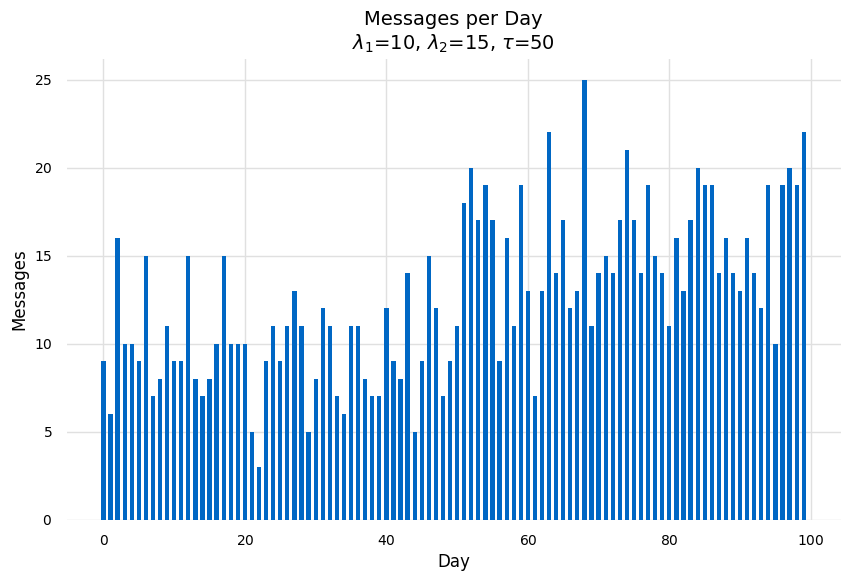

In [4]:
lambda_1 = 10
lambda_2 = 15
ndays = 100
tau = 50
messages = message_simulator(lambda_1, lambda_2, ndays, tau)

bar(messages, ylabel='Messages', xlabel='Day', title=f"Messages per Day\n$\\lambda_1$={lambda_1}, $\\lambda_2$={lambda_2}, $\\tau$={tau}", alpha=1.0, bar_width=0.6)

In [5]:
alpha = 1.0 / messages.mean()

with pymc.Model() as model:
    lambda_1 = pymc.Exponential('lambda_1', alpha)
    lambda_2 = pymc.Exponential('lambda_2', alpha)
    tau = pymc.DiscreteUniform('tau', lower=0, upper=ndays)
    
    trace = pymc.sample(1)

Only 1 samples per chain. Reliable r-hat and ESS diagnostics require longer chains for accurate estimate.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [lambda_1, lambda_2]
>Metropolis: [tau]


/Users/troy/.pyenv/versions/3.11.2/envs/pymc-3.11.2/lib/python3.11/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1 draw iterations (4_000 + 4 draws total) took 1 seconds.
/Users/troy/.pyenv/versions/3.11.2/envs/pymc-3.11.2/lib/python3.11/site-packages/arviz/data/base.py:272: UserWarning: More chains (4) than draws (1). Passed array should have shape (chains, draws, *shape)
  warnings.warn(
The number of samples is too small to check convergence reliably.
